<a href="https://colab.research.google.com/github/HandsomeJames0223/face_recognition/blob/main/face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt update
!apt install -y cmake
!pip install face_recognition
import face_recognition

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Fetched 252 kB in 2s (168 kB/s)
Reading package lists... Done
Building dependency tree       
Readi

In [ ]:
from google.colab import drive
drive.mount("/gdrive")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import glob
flist = glob.glob("/gdrive/My Drive/學習/資料庫/known/*")
flist

['/gdrive/My Drive/學習/資料庫/known/chiling.jpg',
 '/gdrive/My Drive/學習/資料庫/known/Eason.jpg',
 '/gdrive/My Drive/學習/資料庫/known/Jay.jpg',
 '/gdrive/My Drive/學習/資料庫/known/Yui.JPEG']

In [ ]:
unknown_flist = glob.glob("/gdrive/My Drive/學習/資料庫/unknown/*")
unknown_flist

['/gdrive/My Drive/學習/資料庫/unknown/unknown_1.jpeg',
 '/gdrive/My Drive/學習/資料庫/unknown/unknown_5.jpg',
 '/gdrive/My Drive/學習/資料庫/unknown/unknown_8.jpg',
 '/gdrive/My Drive/學習/資料庫/unknown/unknown_7.jpg',
 '/gdrive/My Drive/學習/資料庫/unknown/unknown_3.png',
 '/gdrive/My Drive/學習/資料庫/unknown/unknown_10.jpg',
 '/gdrive/My Drive/學習/資料庫/unknown/unknown_2.jpg',
 '/gdrive/My Drive/學習/資料庫/unknown/unknown_6.jpg',
 '/gdrive/My Drive/學習/資料庫/unknown/unknown_4.jfif',
 '/gdrive/My Drive/學習/資料庫/unknown/unknown_9.jpg']

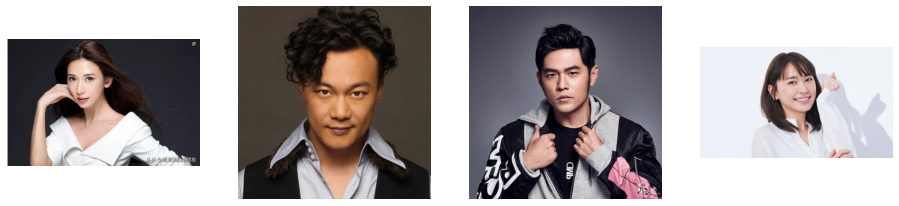

In [ ]:
import face_recognition
#圖像函式庫: PIL(basic)、OpenCV(advanced)
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import os
encodinglist = []
labels = []

width = 5
height = int(len(flist) / width) + 1
plt.figure(figsize=(20, 5))
for (i, f) in enumerate(flist):
    # Step1: 讀取檔案
    img = face_recognition.load_image_file(f)
    # Step2: 把臉的降維向量算出，用已經做好的cnn，[0]第一張臉
    face_encoding = face_recognition.face_encodings(img)[0]
    # Step3: 抓出臉的方框
    (top, right, bottom, left) = face_recognition.face_locations(img, model="cnn")[0]
    # Step4: 把它加到我自己準備的list裡
    encodinglist.append(face_encoding)
    # Step5: 把檔名前面的人名split出來
    name = os.path.split(f)[-1].split(".")[0]
    # Step6: 把人名到我自己準備的list
    labels.append(name)
    plt.subplot(height, width, i + 1)
    plt.axis("off")
    plt.imshow(img)

In [ ]:
encodinglist[2]

array([-0.0894638 ,  0.1586476 ,  0.02809541,  0.03152899, -0.11435246,
       -0.04539696, -0.05111617, -0.10241875,  0.08410117, -0.05586855,
        0.18668872, -0.02036006, -0.19547208, -0.08676377, -0.0532742 ,
        0.13677889, -0.16223374, -0.13872309, -0.06671375,  0.01212934,
        0.14112076,  0.06430169,  0.07489292,  0.08151478, -0.03447443,
       -0.35038611, -0.03514821, -0.10391481,  0.02351097, -0.01388521,
       -0.05916049,  0.04742148, -0.25445858, -0.09691913,  0.03845614,
        0.09967186, -0.01151817, -0.04237527,  0.18459632,  0.00128079,
       -0.19652122,  0.10666345,  0.02717273,  0.29158202,  0.21234012,
        0.05768089,  0.01896307, -0.13761705,  0.11412514, -0.21768317,
        0.10274881,  0.15732008,  0.10766093,  0.03857212,  0.01634397,
       -0.18365589,  0.07595253,  0.01481881, -0.11030949,  0.00690822,
        0.11874159, -0.01424635,  0.00290636, -0.06810985,  0.22576876,
        0.03099373, -0.05536056, -0.18009116,  0.09380475, -0.16

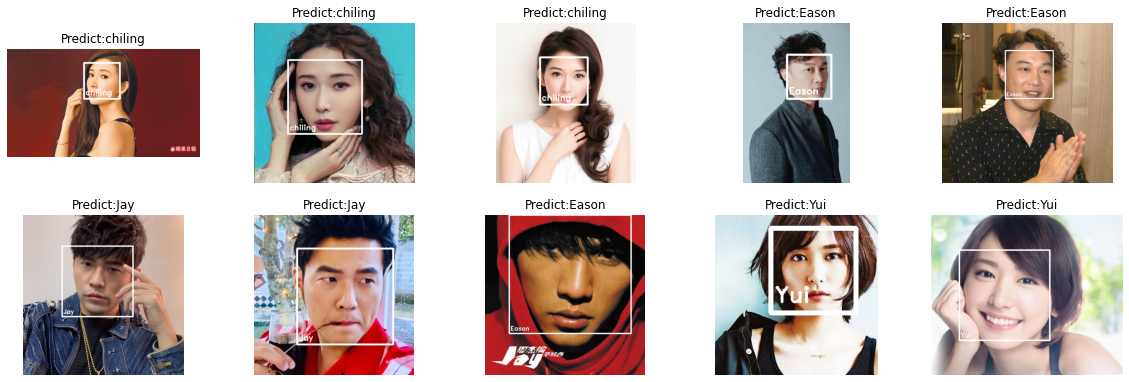

In [ ]:
import numpy as np
plt.figure(figsize=(20,10))
width = 5
height = int(len(unknown_flist) / width) + 1
for (i, f) in enumerate(unknown_flist):
    img = face_recognition.load_image_file(f)
    face_encoding = face_recognition.face_encodings(img)[0]
    # (top, right, bottom, left)
    (top, right, bottom, left) = face_recognition.face_locations(img, model="cnn")[0]
    # renctangle(要畫的圖，左上座標，右下座標，顏色，粗細)
    cv2.rectangle(img, (left, top), (right, bottom), (255, 255, 255), 5)
    font = cv2.FONT_HERSHEY_DUPLEX
    # face_distance -> 算跟你傳進去的encodinglist每一個距離
    results = face_recognition.face_distance(encodinglist, face_encoding)
    name = labels[np.array(results).argmin(axis = -1)]
    labels.append(name)
    # 把文字放到我的圖上
    cv2.putText(img, name, (left + 6, bottom - 15), font, 1, (255, 255, 255), 2)
    plt.subplot(height, width, i + 1)
    plt.title("Predict:" + name)
    plt.axis("off")
    plt.imshow(img)

In [ ]:
# 你可以把跟所有臉的距離列出來，最小值基本上就是我們的答案
results = face_recognition.face_distance(encodinglist, face_encoding)
results

array([0.47014731, 0.63972341, 0.6519348 , 0.33411085])